# 1. Install Dependencies and Setup

In [3]:
!pip install tensorflow tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---- ----------------------------------- 30.5/300.9 MB 1.1 MB/s eta 0:04:06
   ---- ----------------------------------- 30.6/300.9 MB 1.1 MB/s eta 0:04:05
   ---- ----------------------------------- 30.6/300.9 MB 1.1 MB/s eta 0:04:05
   ---- ----------------------------------- 30.7/300.9 MB 1.1 MB/s eta 0:04:06
   ---- ----------------------------------- 30.7/300.9 MB 1.1 MB/s eta 0:04:07
   ---- ----------------------------------- 30.7/300.9 MB 1.1 MB/s eta 0:04:07
   ---- ----------------------------------- 30.8/300.9 MB 1.1 MB/s eta 0:04:06
   ---- ----------------------------------- 30.8/300.9 MB 1.1 MB/s eta 0:04:08
   ---- ----------------------------------- 30.9/300.9 MB 1.1 MB/s eta 0:04:07
   ---- ----------------------------------- 30.9/300.9 MB 1.1 MB/s eta 0:04:08
   ---- ----------------------------------- 31.0/300.9 MB 1.1 MB/s eta 0:04:07
   ---- ----------------------------------- 31.0/300.9 MB 1.1 MB/s eta 0:04:07
   ---- ----------------------------------- 31.1/300

In [4]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.0
gast                         0.5.4
google-auth                  2.26.1
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.19.0
jedi                         0.19.1
jupyter_client               8.6.0



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

C:\Users\HP\AppData\Local\Temp\ipykernel_8352\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data_ty' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data_ty')

Found 199 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [61]:
batch = data_iterator.next()

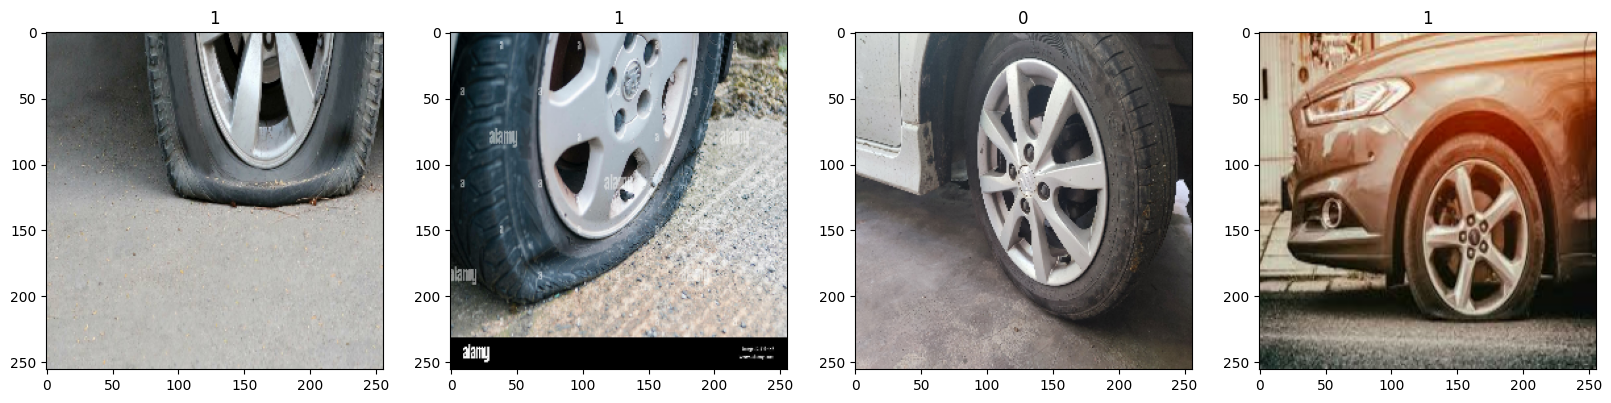

In [62]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y:(x/255,y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.07679587, 0.09248214, 0.10424685],
          [0.04227941, 0.05796568, 0.06973039],
          [0.03529412, 0.05882353, 0.05882353],
          ...,
          [0.03190104, 0.04758732, 0.05150888],
          [0.04227941, 0.05796568, 0.06188725],
          [0.03615196, 0.05183823, 0.0557598 ]],
 
         [[0.0839736 , 0.09965988, 0.11142459],
          [0.04349724, 0.05918352, 0.07094822],
          [0.0339918 , 0.05752121, 0.05752121],
          ...,
          [0.05913804, 0.07482431, 0.07874589],
          [0.06384732, 0.0795336 , 0.08345517],
          [0.0397674 , 0.05545367, 0.05937524]],
 
         [[0.07928921, 0.09497549, 0.1067402 ],
          [0.06102941, 0.07671569, 0.08848039],
          [0.03137255, 0.05490196, 0.05490196],
          ...,
          [0.04307814, 0.05876441, 0.06268598],
          [0.03903952, 0.0547258 , 0.05864736],
          [0.04947653, 0.06516281, 0.06908438]],
 
         ...,
 
         [[0.11531863, 0.11924019, 0.09963235],
          [0.12242

# 5. Split Data

In [28]:
len(data)

7

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [30]:
test_size

1

In [31]:
train_size+val_size+test_size


7

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [39]:
logdir='logt'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 37s 6s/step - loss: 1.0500 - accuracy: 0.4922 - val_loss: 0.6977 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 24s 5s/step - loss: 0.6710 - accuracy: 0.6250 - val_loss: 0.6453 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 15s 2s/step - loss: 0.6359 - accuracy: 0.6172 - val_loss: 0.6451 - val_accuracy: 0.5781
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 0.5817 - accuracy: 0.6875 - val_loss: 0.5524 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5421 - accuracy: 0.7422 - val_loss: 0.5177 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.5029 - accuracy: 0.7734 - val_loss: 0.4526 - val_accuracy: 0.7969
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.4351 - accuracy: 0.8281 - val_loss: 0.3894 - val_accuracy: 0.8438
Epoch 8/20
4/4 [===================

# 8. Plot Performance

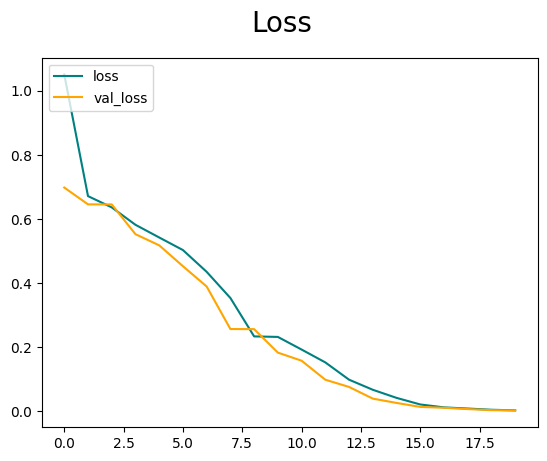

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

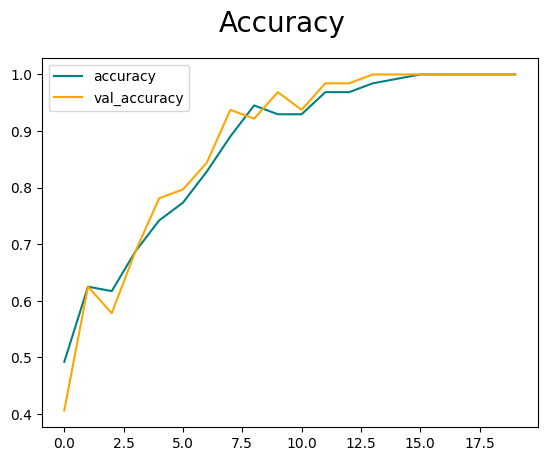

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [47]:
print(f'Precission:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precission:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [48]:
import cv2

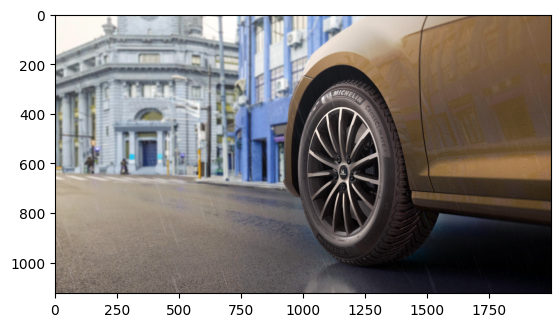

In [68]:
img = cv2.imread('notflat2.jpg')
plt.imshow(img)
plt.show()

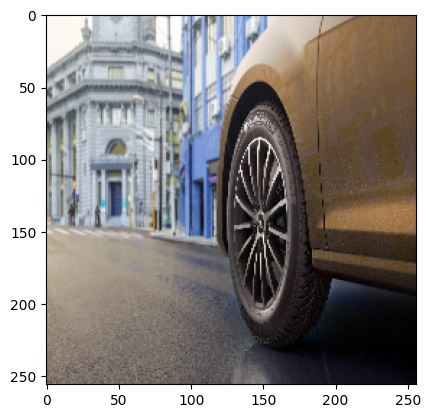

In [69]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 72ms/step


In [71]:
yhat

array([[0.12383243]], dtype=float32)

In [72]:
if yhat > 0.5: 
    print(f'Predicted class is Flat')
else:
    print(f'Predicted class is not Flat')

Predicted class is not Flat


# 11. Save the Model

In [73]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models_ty','Tyreclassnew.h5'))

D:\ImageClassification\imageclassification\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
new_model = load_model(os.path.join('models_ty','Tyreclass.h5'))

In [76]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 128ms/step


array([[0.7825703]], dtype=float32)